In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=pd.read_csv(r"C:\Users\rasgu\OneDrive\Documents\VS Code\ml\datasets\loan.csv")
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

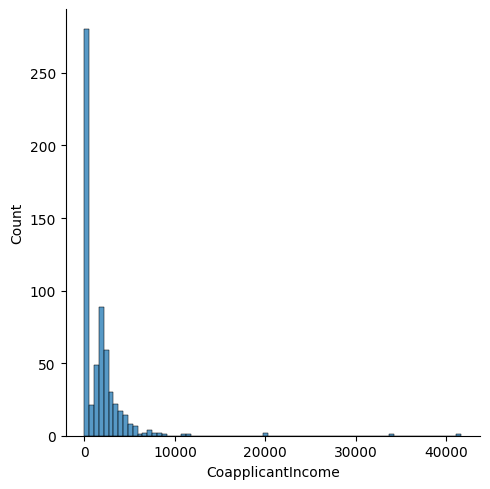

In [3]:
sns.displot(dataset["CoapplicantIncome"])
plt.show()
#remove outlier before converting to normal distribution curve

In [4]:
#iqr method
q1=dataset["CoapplicantIncome"].quantile(0.25)
q3=dataset["CoapplicantIncome"].quantile(0.75)
iqr=q3-q1
min_r=q1-(1.5*iqr)
max_r=q3+(1.5*iqr)
min_r, max_r


(np.float64(-3445.875), np.float64(5743.125))

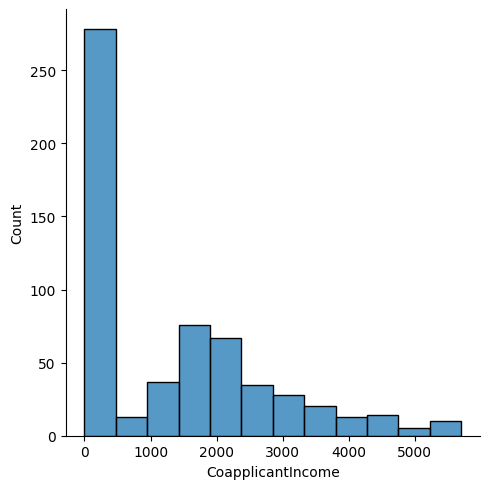

In [5]:
dataset=dataset[dataset["CoapplicantIncome"]<=max_r]
sns.displot(dataset["CoapplicantIncome"])
plt.show() #no outlier, non normal dist data

In [6]:
#fun trans
from sklearn.preprocessing import FunctionTransformer
ft=FunctionTransformer(func=np.log1p)#create any function here
ft.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_tf"]=ft.transform(dataset[["CoapplicantIncome"]])

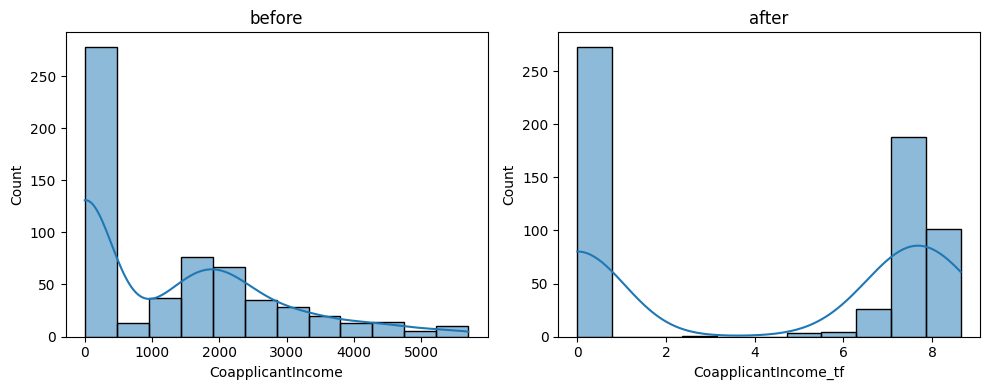

In [7]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("before")
sns.histplot(dataset["CoapplicantIncome"], kde=True)

plt.subplot(1,2,2)
plt.title("after")
sns.histplot(dataset["CoapplicantIncome_tf"], kde=True)

plt.tight_layout()
plt.show()

#no tail will be observed-without outlier

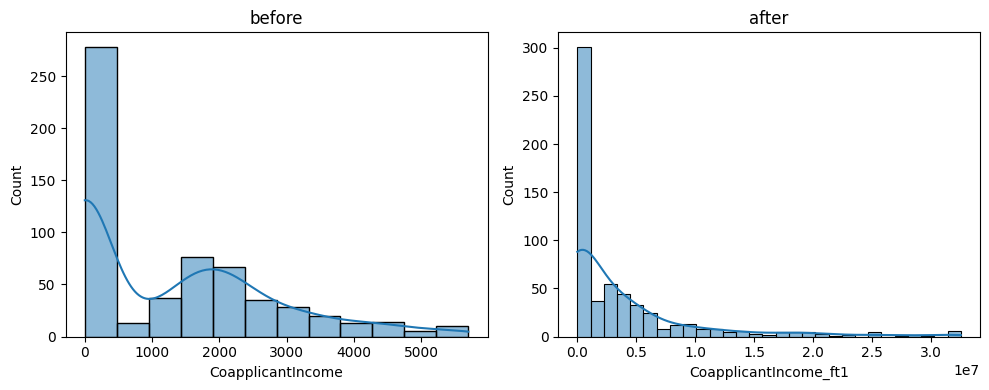

In [8]:
#without removing outlier-tail remains but curve gets converted to normal dist graph

ft1=FunctionTransformer(func=lambda x : x**2) # x sq func
dataset["CoapplicantIncome_ft1"]=ft1.fit_transform(dataset[["CoapplicantIncome"]])

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("before")
sns.histplot(dataset["CoapplicantIncome"], kde=True)

plt.subplot(1,2,2)
plt.title("after")
sns.histplot(dataset["CoapplicantIncome_ft1"], kde=True)

plt.tight_layout()
plt.show()


In [10]:
#we have to create diff func and check by which func our data gets converted to normal dist curve